## Carregar os dados

In [21]:
# Biblioteca para carregar o CSV
import pandas as pd 

# Carregar o CSV
red_wine = pd.read_csv("winequality-red.csv", sep = ";")

# Mostrar apenas o inicio dos dados
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Preparacao dos dados

In [22]:
# Dados de entrada
X = red_wine.drop("quality", axis = 1) # Todo o dataset, sem a coluna 'quality' (1 = coluna / 0 = linha)

# Dado de saida
y = red_wine["quality"] # Apenas a coluna 'quality'

print(X.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    5
1

## Dividir dados para treino e teste

In [23]:
# Funcao da biblioteca para dividir os dados
from sklearn.model_selection import train_test_split

# Separar dados para treinar e testar o modelo
# 80% para treinar e 20% para testar, 42 eh a semente do gerador aleatorio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Escolher o modelo para treinar

In [24]:
# Biblioteca com o modelo de arvore de decisao
from sklearn.tree import DecisionTreeRegressor

# Instanciando o modelo de arvore de decisao para regressao
model = DecisionTreeRegressor(random_state = 42) # Semente do gerador aleatorio

## Treinar o modelo

In [25]:
# Treinando o modelo de Arvore de Decisao
model.fit(X_train, y_train)

# A Árvore de Decisão calcula a entropia de cada possível divisão nos dados
# A entropia é uma medida da "incerteza" ou "impureza" dos dados em um nó
# A fórmula da entropia é: H(C) = - Σ p_i * log2(p_i), onde p_i é a probabilidade de cada classe
# A árvore testa várias divisões para cada feature e calcula a entropia antes e depois da divisão
# Ela escolhe o ponto de corte que resulta na maior redução de entropia, ou seja, que torna os dados mais "puros"
# Esse processo de divisão continua recursivamente até atingir um critério de parada, como:
# - Profundidade máxima da árvore (max_depth)
# - Número mínimo de amostras por nó (min_samples_split)
# - Ou quando a entropia não diminui mais significativamente (pureza dos nós alcançada)
# No final, cada nó folha contém a média dos valores da variável alvo (para regressão) ou a classe mais frequente (para classificação)

# Hiperparâmetros padrão:
# max_depth=None: A árvore cresce até que todas as folhas sejam puras ou até que todas as amostras de um nó pertençam à mesma classe.
# min_samples_split=2: Um nó será dividido se houver pelo menos 2 amostras.
# min_samples_leaf=1: Cada folha pode ter 1 amostra no mínimo.
# max_features=None: Todas as características são consideradas para fazer a divisão no nó.
# criterion="mse" (para regressão): A função usada para medir a qualidade de uma divisão. O valor "mse" significa que o modelo usa o erro quadrático médio (Mean Squared Error) como critério.
# splitter="best": A árvore tenta encontrar a melhor divisão no nó.

DecisionTreeRegressor(random_state=42)

## Visualizar a arvore criada

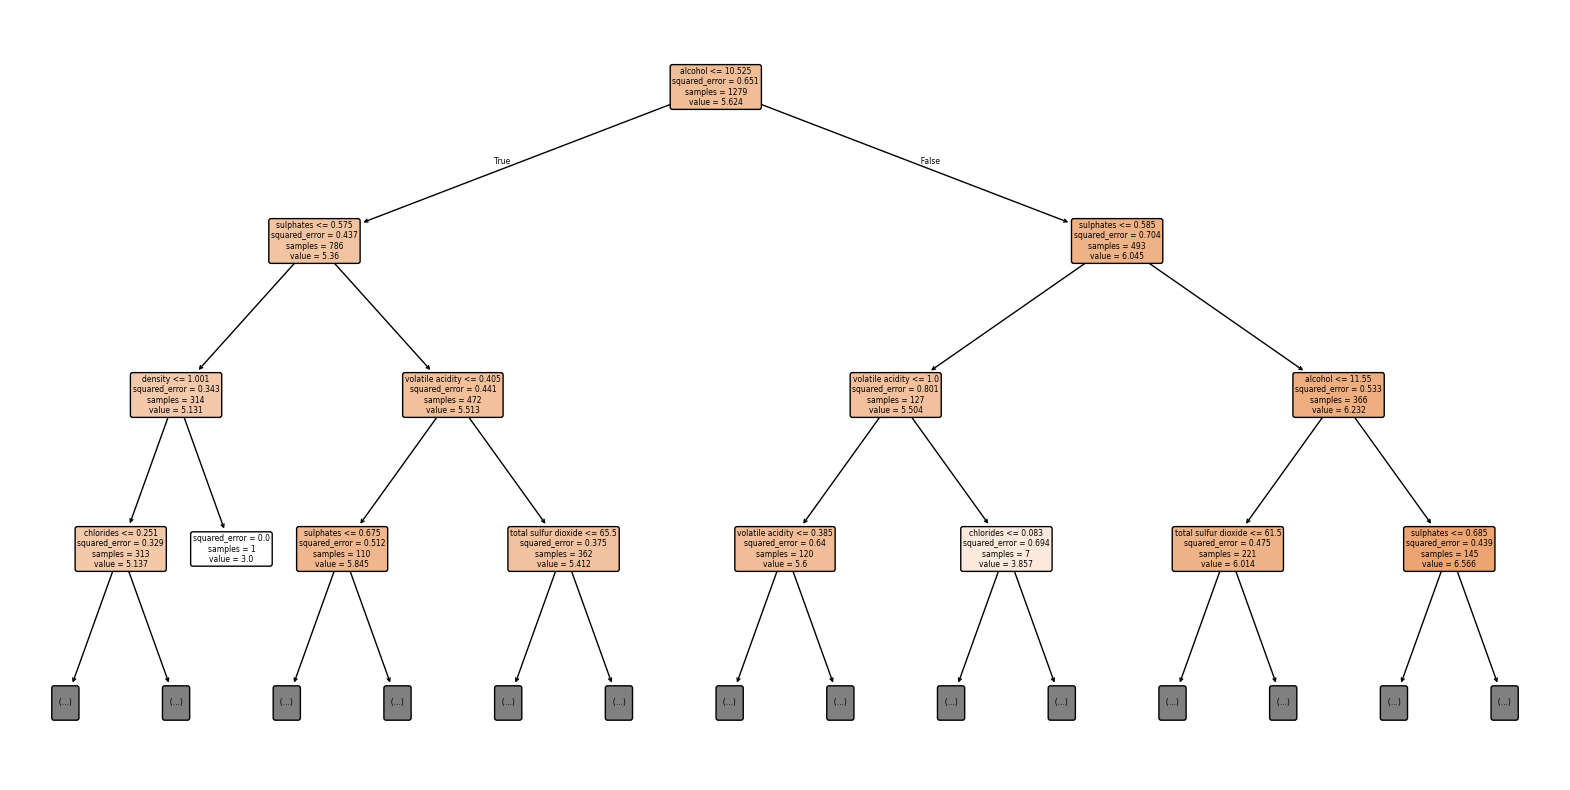

In [26]:
# Funcao da biblioteca para visualizar a arvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotando apenas os primeiros níveis da árvore (limitar a profundidade) para ser possivel visualizar
plt.figure(figsize = (20, 10))  # Ajuste o tamanho da figura conforme necessário
plot_tree(model, filled=True, feature_names = X_train.columns, max_depth = 3, rounded = True)
plt.show()


## Prever com os dados de teste e comparar com os valores reais

In [27]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo as comparações entre os valores reais e as previsões
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Valor Real: {real}, Previsão: {pred}")

Valor Real: 6, Previsão: 6.0
Valor Real: 5, Previsão: 5.0
Valor Real: 6, Previsão: 5.0
Valor Real: 5, Previsão: 5.0
Valor Real: 6, Previsão: 6.0
Valor Real: 5, Previsão: 5.0
Valor Real: 5, Previsão: 5.0
Valor Real: 5, Previsão: 5.0
Valor Real: 5, Previsão: 6.0
Valor Real: 6, Previsão: 6.0


## Avaliar performance do modelo

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Erro Médio Absoluto
mae = mean_absolute_error(y_test, y_pred)
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')

# Erro Quadrático Médio
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

# Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')

# Comentários sobre o significado das métricas:
#   1. MAE (Erro Médio Absoluto): Representa a média das diferenças absolutas entre as previsões e os valores reais.
# Quanto menor o MAE, melhor o modelo. MAE de 0 significa erro nenhum.
#   2. MSE (Erro Quadrático Médio): Mede a média dos quadrados dos erros. Penaliza erros maiores mais do que o MAE.
# MSE menor indica melhor desempenho, e um MSE de 0 indica que o modelo acertou todas as previsões.
#   3. R² (Coeficiente de Determinação): Indica a proporção da variabilidade dos dados que é explicada pelo modelo.
# Valores próximos de 1 indicam que o modelo consegue explicar bem os dados. R² de 0 significa que o modelo não tem poder preditivo.

Erro Médio Absoluto (MAE): 0.46
Erro Quadrático Médio (MSE): 0.61
R²: 0.07


## Tentar melhorar o modelo

In [29]:
# Ajustando os hiperparâmetros da árvore de decisão
model = DecisionTreeRegressor(
    max_depth = 5,               # Limitar a profundidade para evitar overfitting
    min_samples_split = 10,      # Exigir mais amostras para dividir um nó
    min_samples_leaf = 4,        # Exigir mais amostras por nó folha
    max_features = "sqrt",       # Usar a raiz quadrada do número de características
    criterion = "squared_error"  # Usar o erro quadrático médio como critério (padrão)
)

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Recalcular as métricas de erro
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de avaliação
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')


Erro Médio Absoluto (MAE): 0.54
Erro Quadrático Médio (MSE): 0.47
R²: 0.28


## Usando validacao cruzada para encontrar os melhores parametros

In [30]:
# Importando GridSearchCV para realizar a busca dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros que serão testados na árvore de decisão
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Define a profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],   # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4, 10], # Número mínimo de amostras em cada folha
    'max_features': ['sqrt', 'log2', None],  # Número de features consideradas na divisão dos nós
    'criterion': ['squared_error', 'absolute_error']  # Métrica usada para medir a qualidade da divisão
}

# Criando um modelo de árvore de decisão sem definir hiperparâmetros ainda
model = DecisionTreeRegressor()

# Criando o GridSearchCV para testar todas as combinações de hiperparâmetros
grid_search = GridSearchCV(
    model,           # Modelo de árvore de decisão
    param_grid,      # Conjunto de hiperparâmetros a serem testados
    cv = 5,          # Validação cruzada com 5 divisões (para evitar overfitting)
    n_jobs = -1      # Usa todos os núcleos da CPU para acelerar o processo
)

# Treinando o modelo testando todas as combinações de hiperparâmetros
grid_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f'Best parameters: {grid_search.best_params_}')

# Pegando o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Calculando as métricas de erro para avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)  # Erro Médio Absoluto
mse = mean_squared_error(y_test, y_pred)   # Erro Quadrático Médio
r2 = r2_score(y_test, y_pred)              # R² (qualidade do ajuste)

# Exibindo os resultados das métricas
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')

Best parameters: {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Erro Médio Absoluto (MAE): 0.57
Erro Quadrático Médio (MSE): 0.51
R²: 0.22


### Após o ajuste dos hiperparâmetros, o modelo apresentou uma leve melhora, com R² de 0.31. Ainda seria possível aprimorar com uma análise mais detalhada, como a identificação de outliers, a normalização dos dados e a seleção de variáveis mais relevantes, ou até mesmo trocando de modelo. Mas o objetivo era apenas testar árvores de decisão.